# JURNAL MODUL 2

### Import Library

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Cell code di atas merupakan pernyataan impor beberapa library yang akan digunakan dalam jurnal. Cell code tersebut juga menjelaskan bahwa kita mengimpor library dan mempersingkat namanya untuk penggunaan lebih lanjut.

### Pemanggilan Gambar

Untuk cell code dibawah dilakukan dengan membaca gambar menggunakan `plt.imread` lalu mengarahkan path nya kepada foler aset yang digunakan. `plt.imshow` digunakan untuk memanggil gambar yang telah disimpan tadi dan `plt.axis` digunakan agar hasil gambar tidak memiliki garis garis koordinat

(-0.5, 2721.5, 1293.5, -0.5)

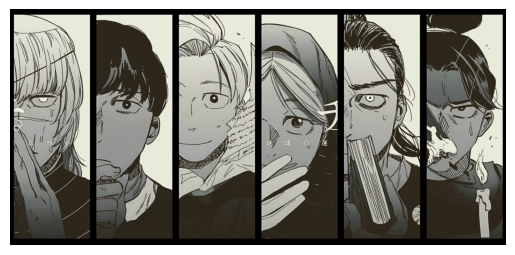

In [11]:
aktivis = plt.imread("Assets/aktivis.jpg")
plt.imshow(aktivis)
plt.axis("off")

### Slicing Gambar

Pada cell code ini menjelaskan bagaimana gambar yang utuh di slice atau di potong untuk memisahkan gambar menjadi beberapa bagian. Penjelasan untuk variabel `main = aktivis [:, :]` yaitu pertama kita membuat variabel untuk setiap gambar dari karakter, lalu kita memanggil gambar dan terdapat array yang menunjukkan posisi dimana gambar akan kita ambil atau potong, contoh pada `main3 = aktivis[:, 0:453]` kita akan mengambil gambar dengan pola, " : " pertama digunakan untuk mengambil posisi vertikal dan " : " kedua mengambil horizontal. Terdapat pemisah vertikal dan horizontal yaitu tanda ",". Berarti dalam konteks `main3 = aktivis[:, 0:453]` yang diambil adalah garis horizontal-nya saja dari pixel 0-453. Lakukan hal ini untuk setiap gambar karakter lalu panggil gambar nya satu per satu

(-0.5, 452.5, 1293.5, -0.5)

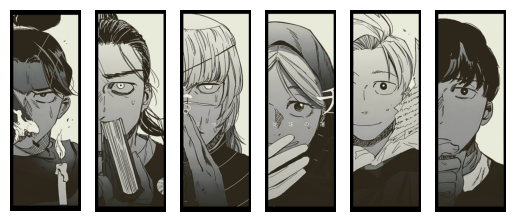

In [12]:
aktivis =plt.imread("Assets/aktivis.jpg")

main6 = aktivis[:, 453:906]
main5 = aktivis[:, 906:1359]
main4 = aktivis[:, 1359:1812]
main3 = aktivis[:, 0:453]
main2 = aktivis[:, 1812:2265]
main1 = aktivis[:, 2265:2722]


plt.subplot(1,6,1)
plt.imshow(main1)
plt.axis("off")

plt.subplot(1,6,2)
plt.imshow(main2)
plt.axis("off")

plt.subplot(1,6,3)
plt.imshow(main3)
plt.axis("off")

plt.subplot(1,6,4)
plt.imshow(main4)
plt.axis("off")

plt.subplot(1,6,5)
plt.imshow(main5)
plt.axis("off")

plt.subplot(1,6,6)
plt.imshow(main6)
plt.axis("off")

### Merge Gambar

Jadi pada cell code ini menjelaskan tentang cara menggabung gambar - gambar yang telah di slice sebelumnya. `aktivisCombine = np.zeros((aktivis.shape[0], aktivis.shape[1], 3), dtype=np.uint8)` digunakan untuk membuat kanvas kosong sebesar gambar `aktivis` dengan 3 channel warna yang di deklarasikan pada `dtype=np.uint8` dan shape terdapat `(tinggi, lebar, 3)`. Setelah itu tempel pada setiap variabel `main` sesuai dengan target gambar. Lalu tampilkan variabelnya


(-0.5, 2721.5, 1293.5, -0.5)

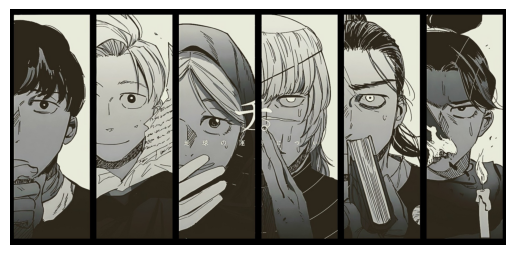

In [13]:
aktivisCombine = np.zeros((aktivis.shape[0], aktivis.shape[1], 3), dtype=np.uint8)

aktivisCombine[:, 0:453] = main6
aktivisCombine[:, 453:906] = main5
aktivisCombine[:, 906:1359] = main4
aktivisCombine[:, 1359:1812] = main3
aktivisCombine[:, 1812:2265] = main2
aktivisCombine[:, 2265:2722] = main1


plt.imshow(aktivisCombine)
plt.axis(False)

### Ekualisasi Gambar

Dalam cell code ini menjelaskan tentang ekualisasi gambar. Pertama `aktivisCombine` diubah menjadi grayscale dan disimpan pada `aktivisGray`. Fungsi `equalize_image(image)` tujuannya untuk distribusi bagian terang-gelap agar kontras menjadi seimbang. variabel `hist, _ = np.histogram(image.flatten(), bins=256, range=[0,256])` digunakan untuk menghitung banyak jumlah pixel dari setiap level kecerahan, lalu `cdf = hist.cumsum()` yaitu membuat jumlah kumulatif yang artinya setiap level keceahan akan dijumlahkan sampai level terakhir. Setelah itu `cdf_normalized = cdf / cdf.max()` membuat cdf pada rentang 0-1 dan variabel `L = 256` untuk set pixel. `equalized_image = np.interp(image.flatten(), range(L), cdf_normalized * (L-1))` digunakan untuk pixel `image` diubah ke nilai baru berdasarkan CDF yang telah di normalisasi dan `.reshape(image.shape).astype(np.uint8)` dibalikin ke bentuk gambar asli. Setelah itu tampilkan gambar

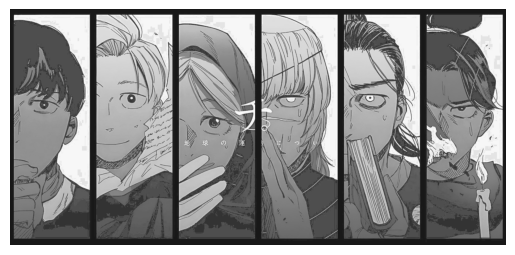

In [14]:
aktivisGray = cv2.cvtColor(aktivisCombine, cv2.COLOR_BGR2GRAY)

def equalize_image(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()
    L = 256
    equalized_image = np.interp(image.flatten(), range(L), cdf_normalized * (L-1)).reshape(image.shape).astype(np.uint8)
    return equalized_image

equalized = equalize_image(aktivisGray)
gambar_equalized = cv2.cvtColor(equalized, cv2.COLOR_GRAY2BGR)

plt.imshow(gambar_equalized)
plt.axis('off')
plt.show()

### Perbandingan Histogram

Cell code ini menjelaskan tentang perbandingan histogram. `plt.figure` digunakan untuk menyiapkan kanvas dengan ukuran `(12, 5)` / 12x5. `plt.hist` untuk menghitung dan menggambar disitribusi intensitas nilai pixel dari 0-255. Untuk warna histogram merah dibuat pada gambar yang belum di ekualisasi menggunakan variabel `aktivisGray.flatten()` dan warna histogram hijau menggunakan variabel `equalized.flatten()`. Setelah itu tampilkan histogram

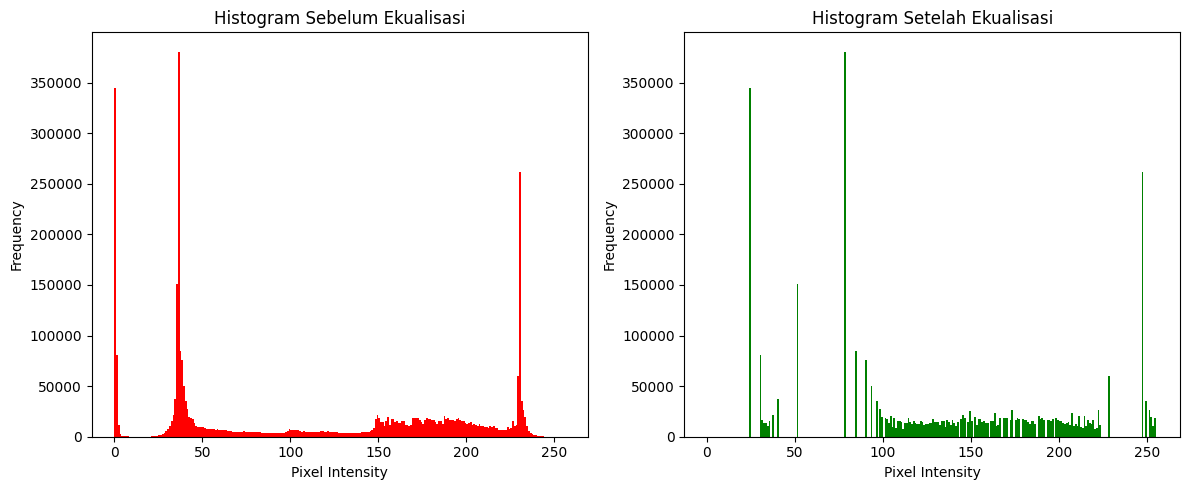

In [15]:
plt.figure(figsize=(12, 5))

# Histogram sebelum ekualisasi
plt.subplot(1, 2, 1)
plt.hist(aktivisGray.flatten(), bins=256, range=[0, 256], color='red')
plt.title('Histogram Sebelum Ekualisasi')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram sesudah ekualisasi
plt.subplot(1, 2, 2)
plt.hist(equalized.flatten(), bins=256, range=[0, 256], color='green')
plt.title('Histogram Setelah Ekualisasi')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Spesifikasi Gambar

Cell code ini menjelaskan tentang spesifikasi gambar atau histogram matching. `spesifikasi(imgInput, imgTarget)` digunakan untuk mengambil parameter gambar awal dan gambar target. `np.histogram` digunakan untuk memberi pixel dari 0-255 pada gambar input dan target. Lalu hitung CDF dari masing-masing histogram dan normalisasi menjadi skala 0-1. variabel `mapping` berguna untuk memberi kanvas untuk hasil dari konversi. `for srcVal in range(256):` mencari setiap level pixel di gambar input, nilai pixel mana pada gambar target yang paling mirip posisi CDF-nya lalu gunakan `np.argmin(diff)` buat nyari selisih terkecil, lalu simpan di variabel `mapping`. `result = mapping[imgInput]` digunakan mengubah seluruh pixel di `imgInput`. `spesifikasiPropaganda = spesifikasi(equalized, propaganda)` dan `spesifikasiDraka = spesifikasi(equalized, draka)` digunakan untuk memanggil fungsi pada hasil ekualisasi gambar sebelumnya

Analisis : Spesifikasi gambar atau histogram matching dilakukan agar distribusi intensitas dari gambar awal agar menyerupai histogram gambar target. Jika target memiliki histogram dominan gelap (contoh : `draka`) artinya mayoritas piksel berada pada rentang intensitas rendah (0-100). Maka saat melakukan spesifikasi gambar terlihat lebih gelap. Sebaliknya jika histogram memiliki intensitas tinggi (150-255) (contoh : `propaganda`) maka gambar terlihat lebih terang.

(-0.5, 2721.5, 1293.5, -0.5)

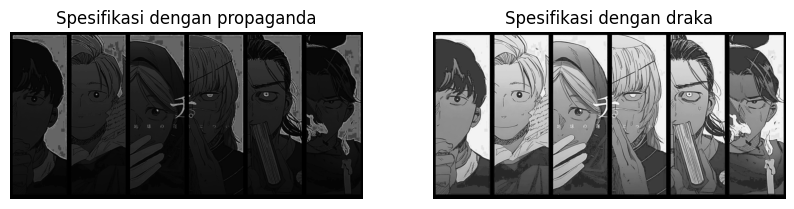

In [16]:
propaganda = plt.imread("Assets/propaganda.jpg")
draka = plt.imread("Assets/draka.jpg")

def spesifikasi(imgInput, imgTarget):
    src_hist, _ = np.histogram(imgInput.flatten(), bins=256, range=[0, 256])
    ref_hist, _ = np.histogram(imgTarget.flatten(), bins=256, range=[0, 256])

    src_cdf = np.cumsum(src_hist).astype(np.float64)
    src_cdf /= src_cdf[-1]
    ref_cdf = np.cumsum(ref_hist).astype(np.float64)
    ref_cdf /= ref_cdf[-1]

    mapping = np.zeros(256, dtype=np.uint8)
    for srcVal in range(256):
        diff = np.abs(ref_cdf - src_cdf[srcVal])
        mapping[srcVal] = np.argmin(diff)
    
    result = mapping[imgInput]
    return result

spesifikasiPropaganda = spesifikasi(equalized, propaganda)
spesifikasiDraka = spesifikasi(equalized, draka)

plt.figure(figsize=(10, 20))

plt.subplot(1,2,1)
plt.imshow(spesifikasiPropaganda, cmap='grey')
plt.title('Spesifikasi dengan propaganda')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(spesifikasiDraka, cmap='grey')
plt.title('Spesifikasi dengan draka')
plt.axis('off')

## Spesifikasi citra dengan menggabungkan 2 spesifikasi :

### Kondisi

Cell code ini menjelaskan bagaimana gambar dibuat menjadi beberapa bagian dari spesifikasi draka dan propaganda. Bagian pertama `press_main6` adalah kolom paling kiri (0:453) yang mengambil hasil spesifikasi gambar `spesifikasiDraka`, jadi tampilannya akan terang. Lalu untuk `press_main5` mengambil sebagian dari `spesifikasiDraka` yaitu baris 0-500 lalu tengah-tengahnya baris 500-600 diambil dari `spesifikasiPropaganda` lalu lanjut sisanya baris 600-habis, gunanya untuk menyisipkan bagian gelap pada gambar yang terang. Hal ini dilakukan juga pada `press_main3` dan `press_main2`. `np.vstack()` berguna untuk menyusun array secara vertikal (atask ke bawah) jadinya semisal kita mempunyai 3 parameter berbeda yang ingin disatukan seperti pada kasus `press_main5`. Setelah itu gabung semua gambar secara horizontal menggunakan `np.hstack()` lalu tampilkan gambar dalam mode grayscale.

(-0.5, 2721.5, 1293.5, -0.5)

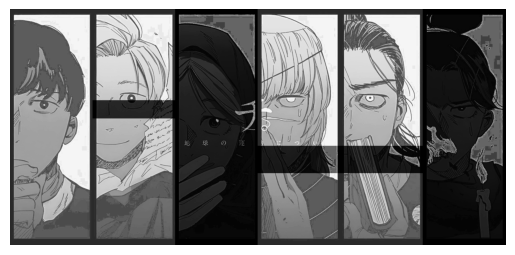

In [17]:
press_main6 = spesifikasiDraka[:, 0:453]

main5_draka = spesifikasiDraka[0:500, 453:906]
main5_propaganda = spesifikasiPropaganda[500:600, 453:906]
main5_draka2 = spesifikasiDraka[600:, 453:906]
press_main5 = np.vstack((main5_draka, main5_propaganda, main5_draka2))

press_main4 = spesifikasiPropaganda[:, 906:1359]

main3_draka = spesifikasiDraka[0:750, 1359:1812]
main3_propaganda = spesifikasiPropaganda[750:900, 1359:1812]
main3_draka2 = spesifikasiDraka[900:, 1359:1812]
press_main3 = np.vstack((main3_draka, main3_propaganda, main3_draka2)) 

main2_draka = spesifikasiDraka[0:750, 1812:2265]
main2_propaganda = spesifikasiPropaganda[750:900, 1812:2265]
main2_draka2 = spesifikasiDraka[900:, 1812:2265]
press_main2 = np.vstack((main2_draka, main2_propaganda, main2_draka2))

press_main1 = spesifikasiPropaganda[:, 2265:2722]

press_gambar = np.hstack((press_main6, press_main5, press_main4, press_main3, press_main2, press_main1))

plt.imshow(press_gambar, cmap="gray")
plt.axis("off")

### Press-Conference

Cell code ini sama seperti hasil spesifikasi diatas. Code ini menjelaskan bagaimana cara mengambil hasil spesifikasi dari 2 target gambar diatas yaitu menggunakan `spesifikasiDraka` dan `spesifikasiPropaganda`. `press_main6` memakai hasil `spesifkasiDraka` yang mana gambar akan terlihat lebih terang. Untuk sisa gambar menggunakan `spesifikasiPropaganda`. `np.hstack()` digunakan untuk menggabungkan gambar dengan horizontal dan tampilkan gambar dalam mode grayscale.

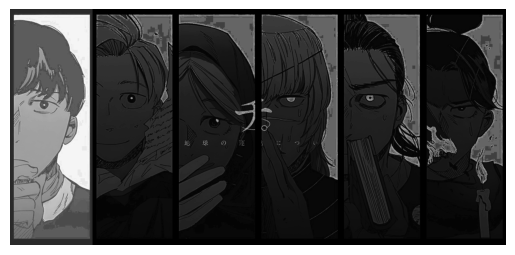

In [18]:
press_main6 = spesifikasiDraka[:, 0:453]

press_main5 = spesifikasiPropaganda[:, 453:906] 
press_main4 = spesifikasiPropaganda[:, 906:1359]  
press_main3 = spesifikasiPropaganda[:, 1359:1812]  
press_main2 = spesifikasiPropaganda[:, 1812:2265]  
press_main1 = spesifikasiPropaganda[:, 2265:2722]  

press_gambar = np.hstack((press_main6, press_main5, press_main4, press_main3, press_main2, press_main1))

plt.imshow(press_gambar, cmap="gray")
plt.axis("off")
plt.show()